# **Task 2: Exploratory Data Analysis (EDA)**
### **Objective:** Understand data using statistics and visualizations.
### **Tools:**  Pandas, Matplotlib, Seaborn, Plotly

### **1.Generate summary statistics (mean, median, std, etc.).**

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("titanic.csv")

# Drop irrelevant columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
          Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


### **2.Create histograms and boxplots for numeric features.**

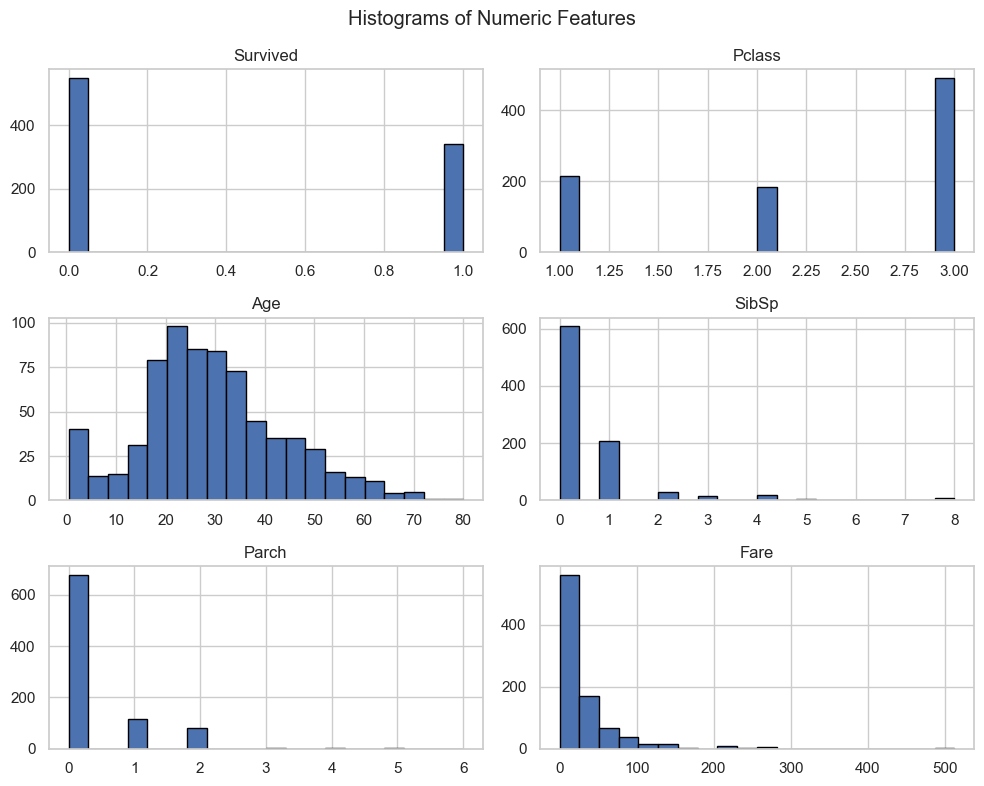

C:\Users\rayas\AppData\Local\Temp\ipykernel_18060\119443169.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, data=df, palette='coolwarm')
C:\Users\rayas\AppData\Local\Temp\ipykernel_18060\119443169.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, data=df, palette='coolwarm')


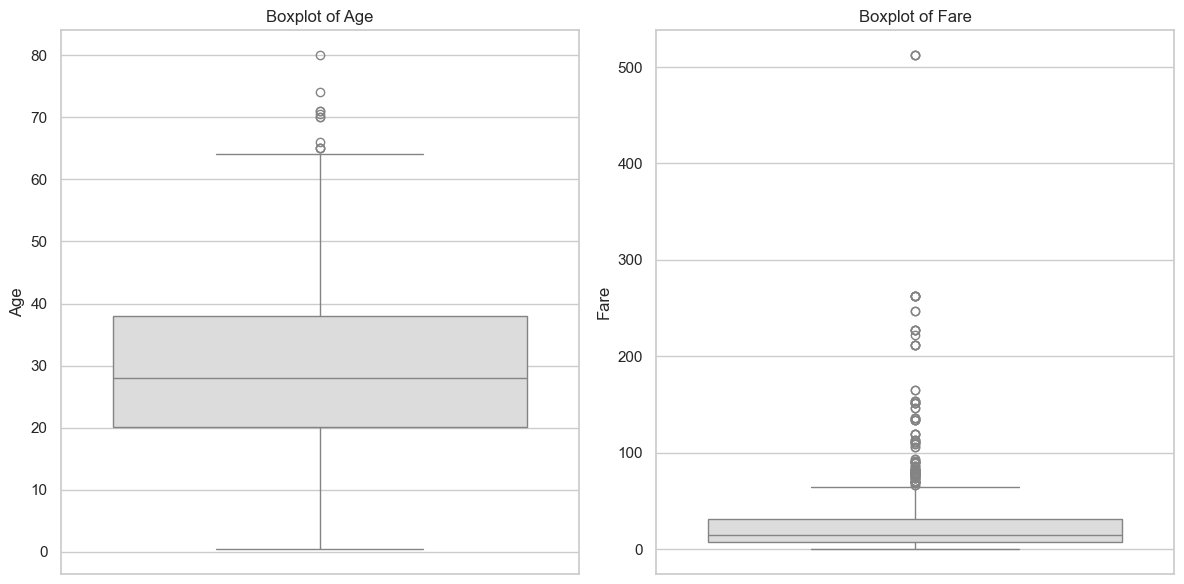

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Histograms
df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Age', 'Fare'], 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=col, data=df, palette='coolwarm')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


### **3.Use pairplot/correlation matrix for feature relationships.**

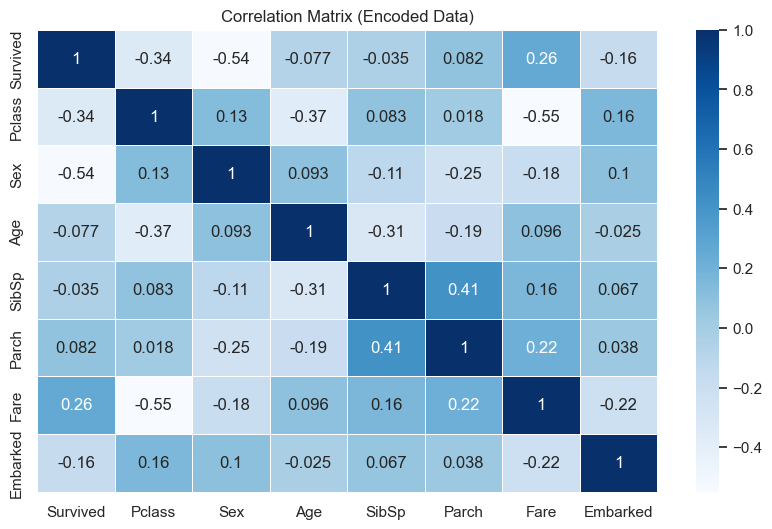

In [5]:
from sklearn.preprocessing import LabelEncoder

# Copy dataframe so original is preserved
df_encoded = df.copy()

# Encode categorical columns
label_enc = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col])
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='Blues', linewidths=0.5)
plt.title("Correlation Matrix (Encoded Data)")
plt.show()


### **4.Identify patterns, trends, or anomalies in the data.**

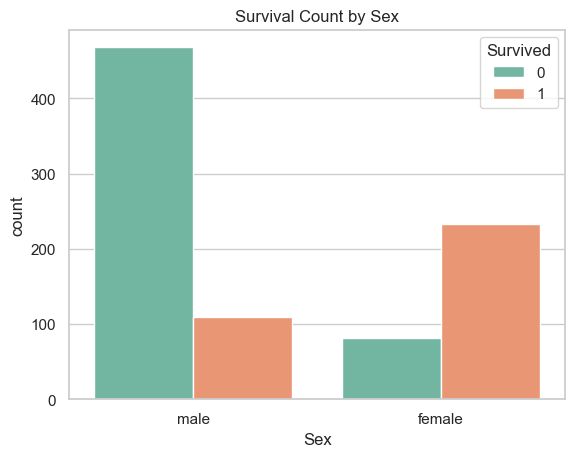

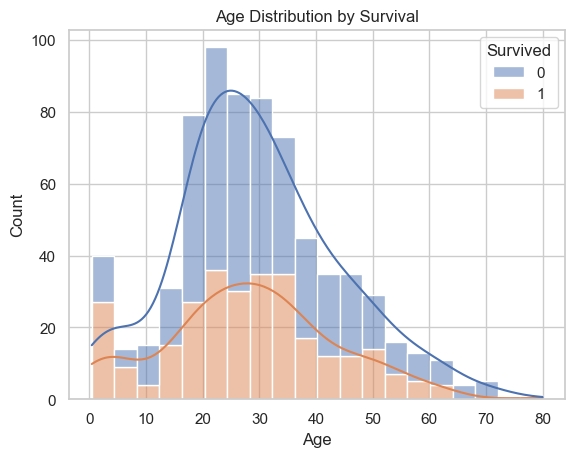

C:\Users\rayas\AppData\Local\Temp\ipykernel_18060\1914949976.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Survived', y='Fare', palette='muted')


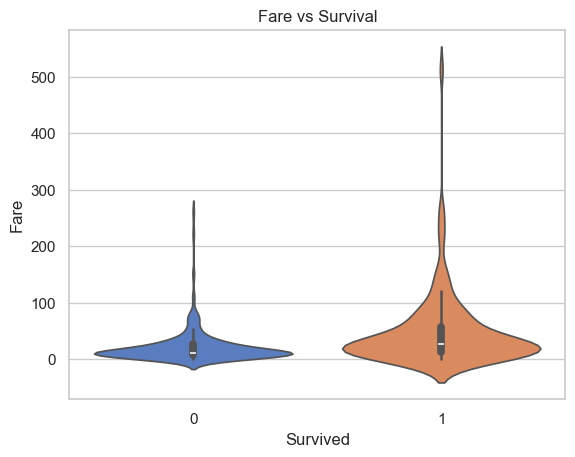

In [6]:
# Survival count based on sex
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set2')
plt.title("Survival Count by Sex")
plt.show()

# Age distribution by survival
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title("Age Distribution by Survival")
plt.show()

# Fare distribution by survival
sns.violinplot(data=df, x='Survived', y='Fare', palette='muted')
plt.title("Fare vs Survival")
plt.show()

### **5.Make basic feature-level inferences from visuals**

In [8]:
# Example: Check average survival by gender
print(df.groupby('Sex')['Survived'].mean())

# Example: Survival rate by passenger class
print(df.groupby('Pclass')['Survived'].mean())

# Age group survival
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 100], labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])
print(df.groupby('AgeGroup')['Survived'].mean())


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
AgeGroup
Child          0.579710
Teen           0.381818
Adult          0.397403
Middle-aged    0.390625
Senior         0.227273
Name: Survived, dtype: float64


C:\Users\rayas\AppData\Local\Temp\ipykernel_18060\3102939093.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AgeGroup')['Survived'].mean())


### **Key Inferences:**
- Females had a significantly higher survival rate.
- Younger passengers had better survival chances.
- Passengers who paid higher fares were more likely to survive.
- Higher Pclass (i.e., 3rd class) is associated with lower survival.
